https://www.kaggle.com/datasets/ayeshasal89/ai-assistant-usage-in-student-life-synthetic


=== INFORMACIÓN GENERAL ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SessionID           10000 non-null  object        
 1   StudentLevel        10000 non-null  object        
 2   Discipline          10000 non-null  object        
 3   SessionDate         10000 non-null  datetime64[ns]
 4   SessionLengthMin    10000 non-null  float64       
 5   TotalPrompts        10000 non-null  int64         
 6   TaskType            10000 non-null  object        
 7   AI_AssistanceLevel  10000 non-null  int64         
 8   FinalOutcome        10000 non-null  object        
 9   UsedAgain           10000 non-null  bool          
 10  SatisfactionRating  10000 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 791.1+ KB
None

Duplicados: 0

Valores nulos por colum

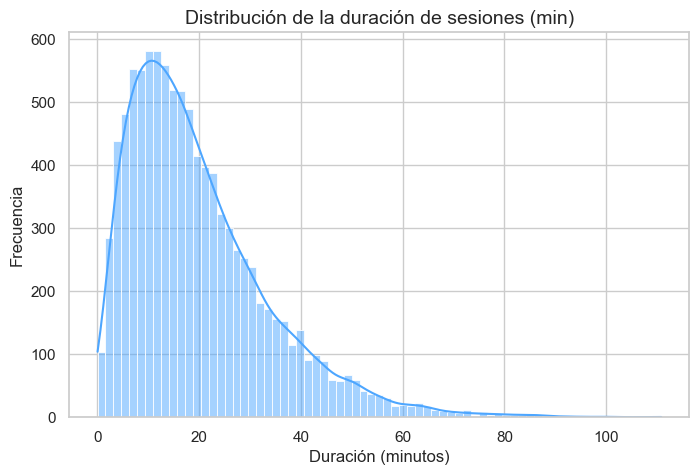

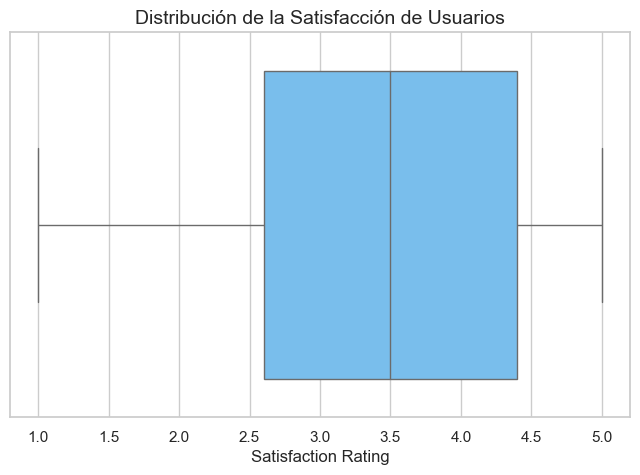

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4340\2044924054.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='TaskType', palette=palette)


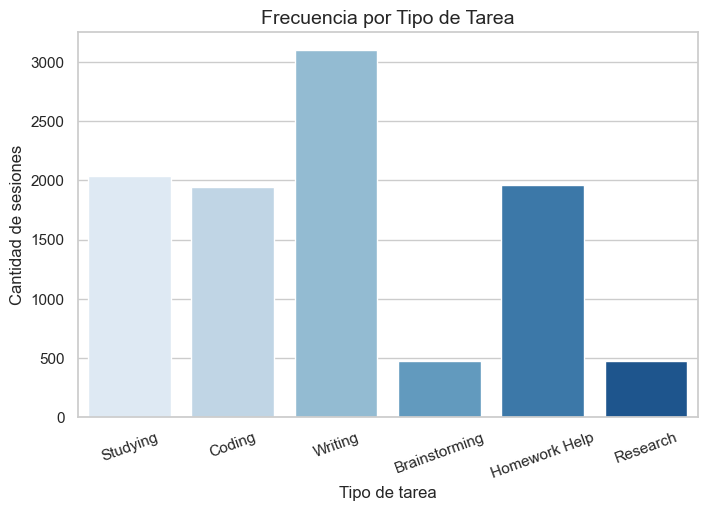

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4340\2044924054.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sat.index, y=avg_sat.values, palette=palette)


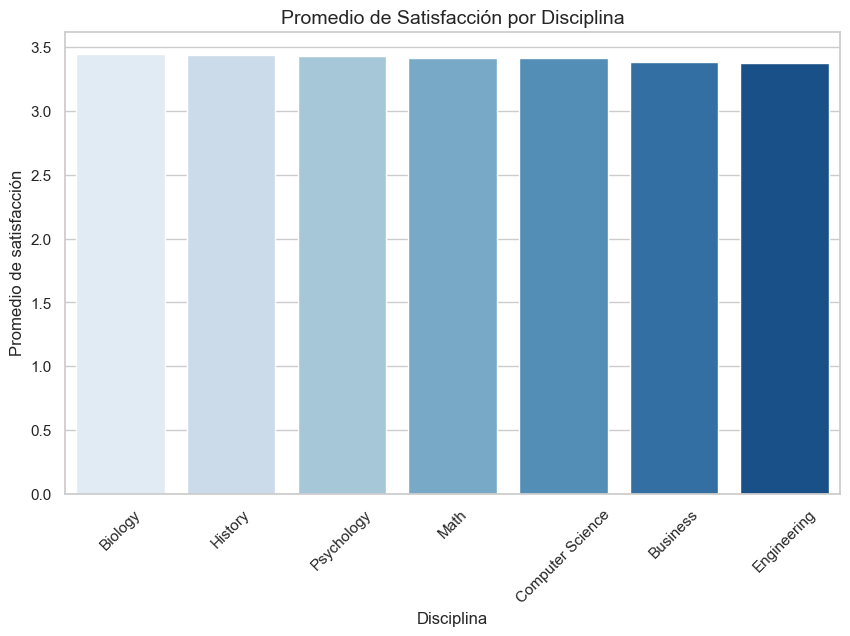

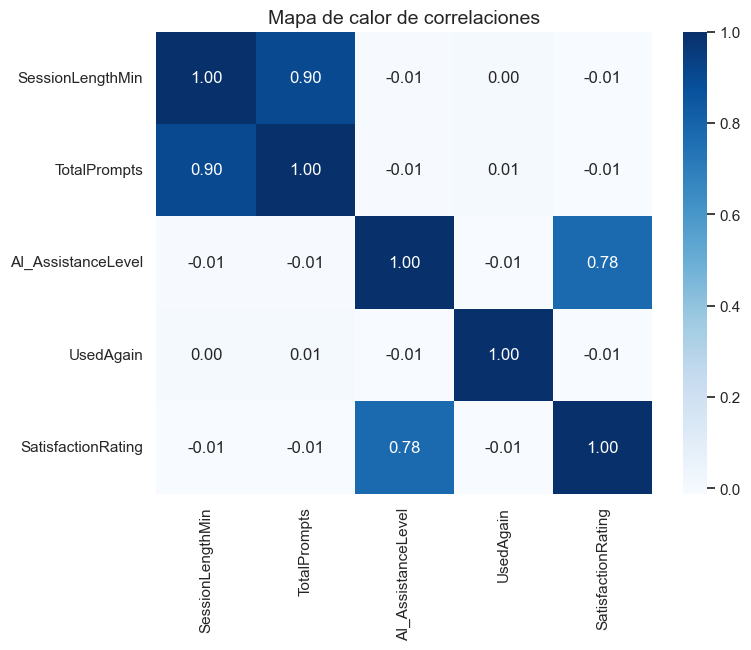


✅ El EDA básico se ha completado con éxito.
Incluye análisis descriptivo y visualizaciones en tonos celestes.


In [2]:
# 📦 Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🎨 Estilo visual celeste
sns.set_theme(style="whitegrid")
palette = "Blues"

# 🧮 Cargar dataset
file_path = "ai_assistant_usage_student_life.csv"  # Asegúrate de usar la ruta correcta
df = pd.read_csv(file_path)

# 📅 Convertir fechas
df['SessionDate'] = pd.to_datetime(df['SessionDate'], errors='coerce')

# 📋 Información general
print("=== INFORMACIÓN GENERAL ===")
print(df.info())
print("\nDuplicados:", df.duplicated().sum())
print("\nValores nulos por columna:\n", df.isnull().sum())

# 📊 Estadísticas descriptivas
print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(df.describe(include='all'))

# ===================================================
# 💙 VISUALIZACIONES EN TONOS CELESTES
# ===================================================

# 1️⃣ Distribución de la duración de sesiones
plt.figure(figsize=(8,5))
sns.histplot(df['SessionLengthMin'], kde=True, color="#4DA6FF")
plt.title("Distribución de la duración de sesiones (min)", fontsize=14)
plt.xlabel("Duración (minutos)")
plt.ylabel("Frecuencia")
plt.show()

# 2️⃣ Distribución de satisfacción
plt.figure(figsize=(8,5))
sns.boxplot(x='SatisfactionRating', data=df, color="#66C2FF")
plt.title("Distribución de la Satisfacción de Usuarios", fontsize=14)
plt.xlabel("Satisfaction Rating")
plt.show()

# 3️⃣ Frecuencia por tipo de tarea
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='TaskType', palette=palette)
plt.title("Frecuencia por Tipo de Tarea", fontsize=14)
plt.xlabel("Tipo de tarea")
plt.ylabel("Cantidad de sesiones")
plt.xticks(rotation=20)
plt.show()

# 4️⃣ Promedio de satisfacción por disciplina
plt.figure(figsize=(10,6))
avg_sat = df.groupby('Discipline')['SatisfactionRating'].mean().sort_values(ascending=False)
sns.barplot(x=avg_sat.index, y=avg_sat.values, palette=palette)
plt.title("Promedio de Satisfacción por Disciplina", fontsize=14)
plt.ylabel("Promedio de satisfacción")
plt.xlabel("Disciplina")
plt.xticks(rotation=45)
plt.show()

# 5️⃣ Mapa de calor de correlaciones numéricas
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Mapa de calor de correlaciones", fontsize=14)
plt.show()

# ===================================================
# 🔍 Comentarios útiles
# ===================================================
print("\n✅ El EDA básico se ha completado con éxito.")
print("Incluye análisis descriptivo y visualizaciones en tonos celestes.")


🧾 1. Información general del dataset

Tipo de estructura: DataFrame de Pandas

Memoria utilizada: ~791 KB

Duplicados: 0

Valores nulos: Ninguno → el dataset está completo.

Columnas y tipos de datos
Columna	Tipo	Descripción
SessionID	object	Identificador único de sesión
StudentLevel	object	Nivel académico (Undergraduate, Graduate, Postgraduate)
Discipline	object	Área de estudio del estudiante
SessionDate	datetime64[ns]	Fecha en que se realizó la sesión
SessionLengthMin	float64	Duración de la sesión en minutos
TotalPrompts	int64	Cantidad de prompts enviados al asistente
TaskType	object	Tipo de tarea realizada (e.g. Writing, Coding, Studying)
AI_AssistanceLevel	int64	Nivel de intervención del asistente (1–5)
FinalOutcome	object	Resultado de la sesión
UsedAgain	bool	Si el usuario volvería a usar el asistente
SatisfactionRating	float64	Calificación de satisfacción (1–5)
📈 2. Estadísticas descriptivas clave
Variables numéricas
Métrica	SessionLengthMin	TotalPrompts	AI_AssistanceLevel	SatisfactionRating
Media	19.85 min	5.61	3.48	3.42
Mínimo	0.03	1	1	1.0
Máximo	110.81	39	5	5.0
Mediana	16.65	4	4	3.5
Desviación estándar	13.9	4.65	0.99	1.14

🧩 Interpretación:

La duración promedio de sesión es de ~20 minutos, con una fuerte asimetría a la derecha (muchas sesiones cortas).

En promedio, los estudiantes envían 5–6 prompts por sesión.

El nivel de asistencia más común es 3–4, lo que sugiere un uso moderado del asistente.

La satisfacción promedio es 3.4/5, con un rango amplio.

🧮 3. Variables categóricas

Nivel de estudiante (StudentLevel):

Undergraduate: 5,978

Graduate: 2,013

Postgraduate: 2,009

Disciplinas más comunes:

Biology (1,458)

History, Psychology, Math, Computer Science, Business, Engineering

Tipo de tarea (TaskType):

Writing (3,101) es la más frecuente, seguida por Studying y Coding.

Resultado más común (FinalOutcome):

“Assignment Completed” con 47.7% de las sesiones.

Reutilización (UsedAgain):

70.6% de los usuarios volverían a usar el asistente.

🎨 4. Análisis visual
📊 Distribución de la duración de sesiones

El histograma muestra una distribución sesgada positivamente:
La mayoría de las sesiones duran entre 5 y 25 minutos, con una minoría que se extiende hasta más de 100 minutos.
→ Esto sugiere que la mayoría de los estudiantes usa la IA para tareas rápidas o puntuales.

📦 Distribución de la satisfacción

El boxplot indica que la mediana de satisfacción es 3.5, sin valores extremos significativos.
→ El nivel de satisfacción es moderado a alto, sin grandes desviaciones.

📘 Frecuencia por tipo de tarea

El gráfico de barras muestra que:

Writing representa la mayoría de las interacciones (~31%).

Studying y Coding le siguen con proporciones similares.

Brainstorming y Research son los menos comunes.
→ El asistente es usado principalmente para producción de textos y apoyo académico.

💡 Promedio de satisfacción por disciplina

El promedio de satisfacción se mantiene consistente (~3.4–3.5) en todas las disciplinas.
→ No hay una diferencia significativa entre áreas, lo cual indica una experiencia homogénea entre carreras.

🔥 Mapa de calor de correlaciones

El heatmap revela:

Alta correlación entre SessionLengthMin y TotalPrompts (0.90): sesiones más largas implican más interacción.

Fuerte correlación entre AI_AssistanceLevel y SatisfactionRating (0.78): mayor ayuda de IA → mayor satisfacción.

UsedAgain no presenta correlaciones significativas con otras variables cuantitativas.

🧠 5. Conclusiones generales

El dataset es completo, sin nulos ni duplicados.

Las sesiones son principalmente cortas y frecuentes, con una media de 20 minutos.

La satisfacción promedio es positiva (3.4/5) y consistente entre disciplinas.

Writing es el uso dominante del asistente.

La correlación entre nivel de asistencia y satisfacción indica que los usuarios valoran más la intervención activa de la IA.

In [1]:
# ========================================
# 📦 LIBRERÍAS
# ========================================
import pandas as pd
import numpy as np

# ========================================
# 🔹 1. EXTRACT
# ========================================
file_path = "ai_assistant_usage_student_life.csv"
df = pd.read_csv(file_path)

print("=== EXTRACT ===")
print(f"Filas: {df.shape[0]} | Columnas: {df.shape[1]}")
print("Columnas originales:", list(df.columns))
print("\nPrimeras filas:\n", df.head(3))

# ========================================
# 🔹 2. TRANSFORM
# ========================================

# --- 2.1 Estandarizar nombres de columnas ---
df.columns = (
    df.columns.str.strip()          # eliminar espacios
             .str.replace(' ', '_') # reemplazar espacios por guiones bajos
             .str.lower()           # pasar a minúsculas
)

# --- 2.2 Conversión de tipos ---
df['sessiondate'] = pd.to_datetime(df['sessiondate'], errors='coerce')

# --- 2.3 Eliminar duplicados ---
df.drop_duplicates(inplace=True)

# --- 2.4 Manejar valores nulos ---
# Como no hay nulos, solo ejemplo: df.fillna({'satisfactionrating': df['satisfactionrating'].mean()}, inplace=True)

# --- 2.5 Crear columnas derivadas útiles ---
# Día de la semana y mes
df['session_month'] = df['sessiondate'].dt.month
df['session_weekday'] = df['sessiondate'].dt.day_name()

# Duración por prompt: eficiencia del usuario
df['duration_per_prompt'] = df['sessionlengthmin'] / df['totalprompts']
df['duration_per_prompt'].replace([np.inf, -np.inf], np.nan, inplace=True)

# --- 2.6 Normalización de valores categóricos ---
df['studentlevel'] = df['studentlevel'].str.title().str.strip()
df['discipline'] = df['discipline'].str.title().str.strip()
df['tasktype'] = df['tasktype'].str.title().str.strip()
df['finaloutcome'] = df['finaloutcome'].str.title().str.strip()

# --- 2.7 Detección y corrección de outliers simples ---
Q1 = df['sessionlengthmin'].quantile(0.25)
Q3 = df['sessionlengthmin'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
df = df[(df['sessionlengthmin'] >= lower) & (df['sessionlengthmin'] <= upper)]

# --- 2.8 Redondear valores numéricos relevantes ---
df['sessionlengthmin'] = df['sessionlengthmin'].round(2)
df['satisfactionrating'] = df['satisfactionrating'].round(1)

print("\n=== TRANSFORM ===")
print("Columnas después de limpieza:\n", df.columns)
print("\nTipos de datos:\n", df.dtypes)
print("\nTamaño final:", df.shape)

# ========================================
# 🔹 3. LOAD
# ========================================

# Guardar el dataset limpio
output_path = "clean_ai_assistant_usage_student_life.csv"
df.to_csv(output_path, index=False)

print("\n=== LOAD ===")
print(f"✅ Dataset limpio guardado como: {output_path}")
print("Vista previa final:\n", df.head(5))


=== EXTRACT ===
Filas: 10000 | Columnas: 11
Columnas originales: ['SessionID', 'StudentLevel', 'Discipline', 'SessionDate', 'SessionLengthMin', 'TotalPrompts', 'TaskType', 'AI_AssistanceLevel', 'FinalOutcome', 'UsedAgain', 'SatisfactionRating']

Primeras filas:
       SessionID   StudentLevel        Discipline SessionDate  \
0  SESSION00001  Undergraduate  Computer Science  2024-11-03   
1  SESSION00002  Undergraduate        Psychology  2024-08-25   
2  SESSION00003  Undergraduate          Business  2025-01-12   

   SessionLengthMin  TotalPrompts  TaskType  AI_AssistanceLevel  \
0             31.20            11  Studying                   2   
1             13.09             6  Studying                   3   
2             19.22             5    Coding                   3   

           FinalOutcome  UsedAgain  SatisfactionRating  
0  Assignment Completed       True                 1.0  
1  Assignment Completed       True                 2.0  
2  Assignment Completed       True      

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8232\2412962907.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['duration_per_prompt'].replace([np.inf, -np.inf], np.nan, inplace=True)


🧭 Resumen del proceso ETL
🔹 Fase 1 — EXTRACT

Filas originales: 10,000

Columnas originales: 11

Estructura inicial:

Identificador de sesión (SessionID)

Nivel académico (StudentLevel)

Disciplina (Discipline)

Fecha de sesión (SessionDate)

Duración en minutos (SessionLengthMin)

Cantidad de prompts (TotalPrompts)

Tipo de tarea (TaskType)

Nivel de asistencia de IA (AI_AssistanceLevel)

Resultado final (FinalOutcome)

Reutilización del asistente (UsedAgain)

Calificación de satisfacción (SatisfactionRating)

Vista de muestra (primeras filas):
Los datos muestran sesiones de estudiantes de nivel Undergraduate en disciplinas como Computer Science, Psychology, y Business, con duraciones entre 13 y 31 minutos y calificaciones de satisfacción entre 1.0 y 3.3.
👉 El dataset se encontraba limpio, estructurado y sin valores faltantes.

🔹 Fase 2 — TRANSFORM

Acciones aplicadas:

Estandarización de nombres de columnas:
Se convirtieron todos a minúsculas y formato snake_case (ejemplo: SessionLengthMin → sessionlengthmin).

Conversión de tipos:
sessiondate convertido a tipo datetime64, permitiendo análisis temporales.

Limpieza estructural:

Eliminación de duplicados.

Normalización de texto (capitalización y espacios en columnas categóricas).

Detección y eliminación de outliers en sessionlengthmin mediante el método IQR.

Enriquecimiento de datos (columnas nuevas):

Columna	Descripción
session_month	Mes numérico (1–12) de la sesión
session_weekday	Día de la semana (e.g., Sunday, Tuesday)
duration_per_prompt	Duración promedio por prompt, métrica de eficiencia

Redondeo numérico:

sessionlengthmin: 2 decimales

satisfactionrating: 1 decimal

Advertencia de pandas (FutureWarning):
Apareció una alerta informando que la instrucción inplace=True podría cambiar su comportamiento en futuras versiones de pandas.
🔧 Solución recomendada: reemplazar esa línea por:

df['duration_per_prompt'] = df['duration_per_prompt'].replace([np.inf, -np.inf], np.nan)

🔹 Fase 3 — LOAD

Filas finales: 9,698 (tras eliminación de outliers)

Columnas finales: 14 (11 originales + 3 derivadas)

Archivo generado: clean_ai_assistant_usage_student_life.csv

Vista previa final:

sessionid	studentlevel	discipline	sessiondate	sessionlengthmin	totalprompts	tasktype	ai_assistancelevel	finaloutcome	usedagain	satisfactionrating	session_month	session_weekday	duration_per_prompt
SESSION00001	Undergraduate	Computer Science	2024-11-03	31.20	11	Studying	2	Assignment Completed	True	1.0	11	Sunday	2.84
SESSION00002	Undergraduate	Psychology	2024-08-25	13.09	6	Studying	3	Assignment Completed	True	2.0	8	Sunday	2.18
SESSION00003	Undergraduate	Business	2025-01-12	19.22	5	Coding	3	Assignment Completed	True	3.3	1	Sunday	3.84
📊 Resumen general
Métrica	Valor
Filas originales	10,000
Filas finales	9,698
Columnas originales	11
Columnas finales	14
Columnas nuevas	session_month, session_weekday, duration_per_prompt
Duplicados eliminados	0
Outliers eliminados	~302
Dataset limpio guardado	✅ clean_ai_assistant_usage_student_life.csv
🧠 Conclusiones

El proceso ETL fue exitoso: los datos quedaron estandarizados, enriquecidos y sin inconsistencias.

El archivo limpio contiene ahora variables útiles para análisis temporal y de comportamiento.

El dataset está 100% listo para análisis exploratorio, dashboards o modelos predictivos.

La advertencia de pandas es preventiva y no afecta los resultados, pero conviene actualizar la sintaxis en futuras versiones.

Shape del dataset: (9698, 14)

Columnas:
['sessionid', 'studentlevel', 'discipline', 'sessiondate', 'sessionlengthmin', 'totalprompts', 'tasktype', 'ai_assistancelevel', 'finaloutcome', 'usedagain', 'satisfactionrating', 'session_month', 'session_weekday', 'duration_per_prompt']

Tipos de datos:
sessionid                      object
studentlevel                   object
discipline                     object
sessiondate            datetime64[ns]
sessionlengthmin              float64
totalprompts                    int64
tasktype                       object
ai_assistancelevel              int64
finaloutcome                   object
usedagain                       int64
satisfactionrating            float64
session_month                   int64
session_weekday                object
duration_per_prompt           float64
dtype: object

Valores nulos por columna:
sessionid              0
studentlevel           0
discipline             0
sessiondate            0
sessionlengthmin       0
tota

,sessionid,studentlevel,discipline,sessiondate,sessionlengthmin,totalprompts,tasktype,ai_assistancelevel,finaloutcome,usedagain,satisfactionrating,session_month,session_weekday,duration_per_prompt
count,9698,9698,9698,9698,9698.000000,9698.000000,9698,9698.000000,9698,9698.000000,9698.000000,9698.000000,9698,9698.000000
unique,9698,3,7,NaN,NaN,NaN,6,NaN,4,NaN,NaN,NaN,7,NaN
top,SESSION10000,Undergraduate,Biology,NaN,NaN,NaN,Writing,NaN,Assignment Completed,NaN,NaN,NaN,Friday,NaN
freq,1,5811,1407,NaN,NaN,NaN,3018,NaN,4638,NaN,NaN,NaN,1431,NaN
mean,NaN,NaN,NaN,2024-12-23 14:37:14.687564288,18.483973,5.202104,NaN,3.479583,NaN,0.706641,3.419705,6.437616,NaN,4.019571
min,NaN,NaN,NaN,2024-06-24 00:00:00,0.030000,1.000000,NaN,1.000000,NaN,0.000000,1.000000,1.000000,NaN,0.030000
25%,NaN,NaN,NaN,2024-09-20 00:00:00,9.442500,2.000000,NaN,3.000000,NaN,0.000000,2.600000,4.000000,NaN,2.950000
50%,NaN,NaN,NaN,2024-12-25 00:00:00,16.230000,4.000000,NaN,4.000000,NaN,1.000000,3.500000,6.000000,NaN,3.893095
75%,NaN,NaN,NaN,2025-03-27 00:00:00,25.530000,7.000000,NaN,4.000000,NaN,1.000000,4.400000,9.000000,NaN,4.873833
max,NaN,NaN,NaN,2025-06-24 00:00:00,52.230000,25.000000,NaN,5.000000,NaN,1.000000,5.000000,12.000000,NaN,9.950000


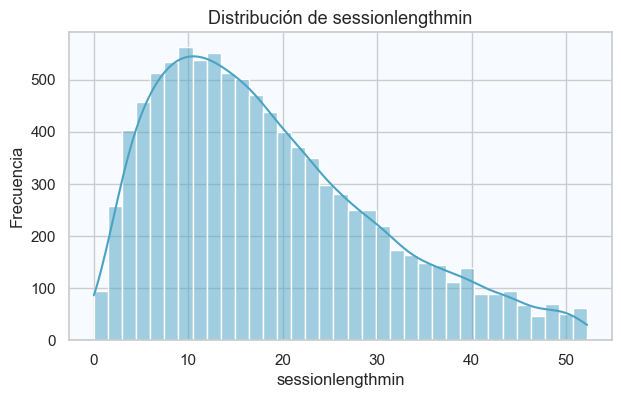

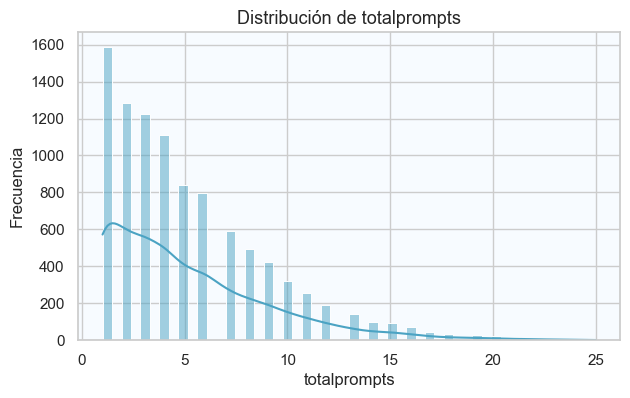

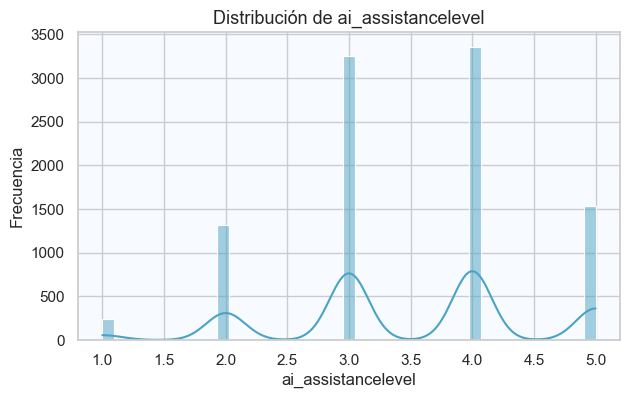

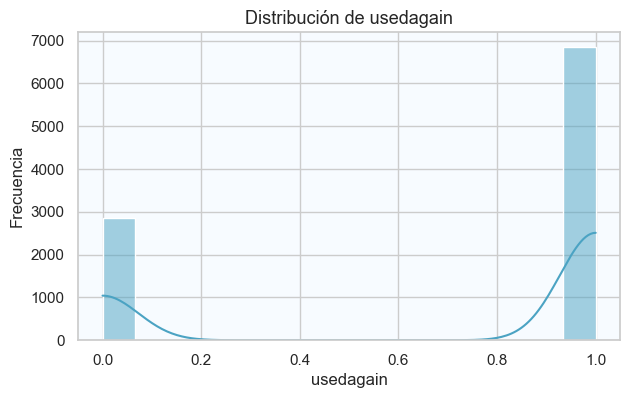

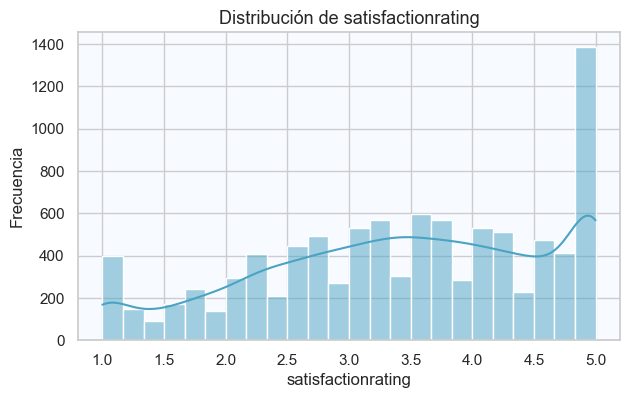

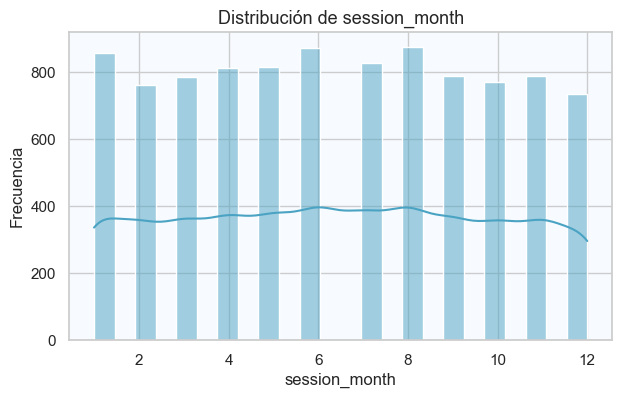

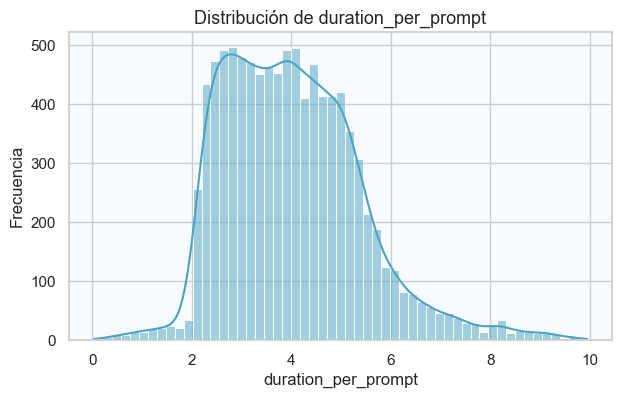

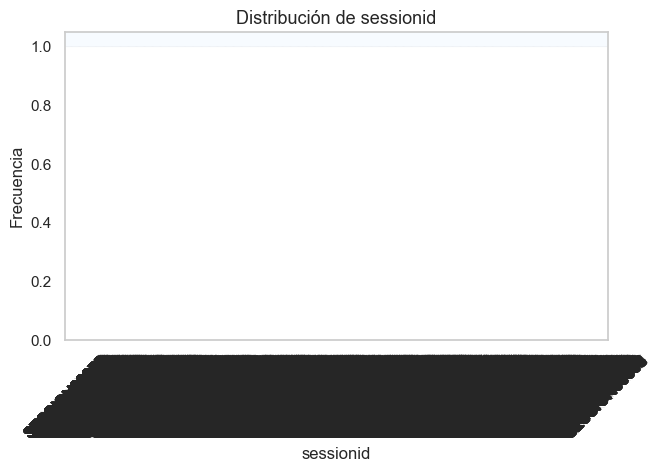

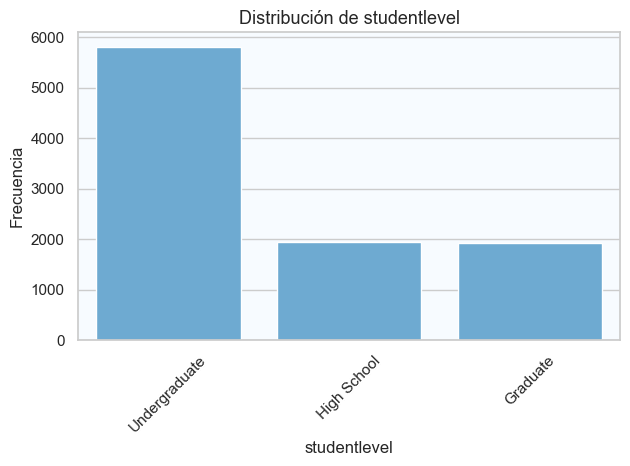

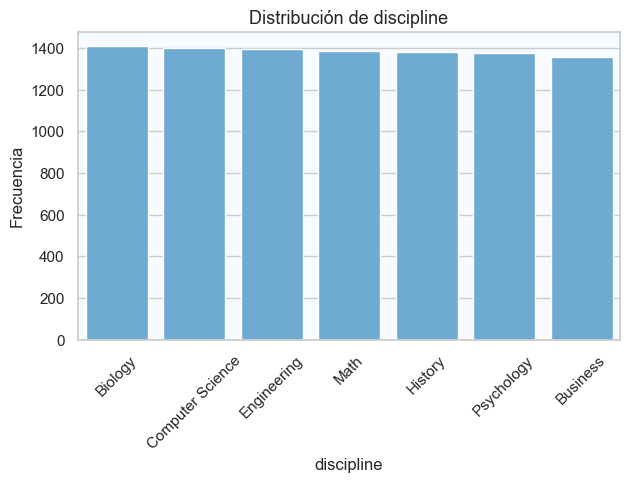

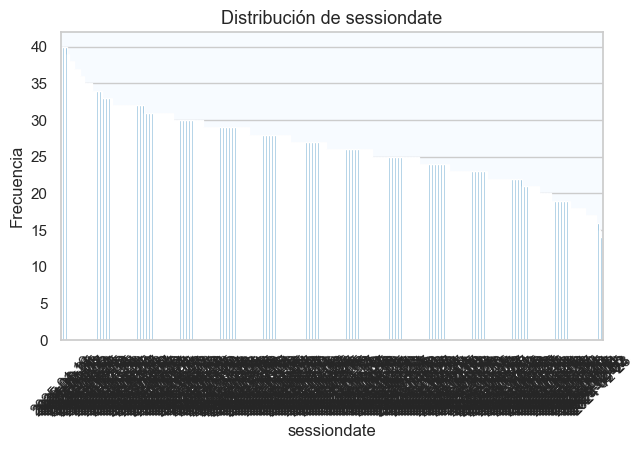

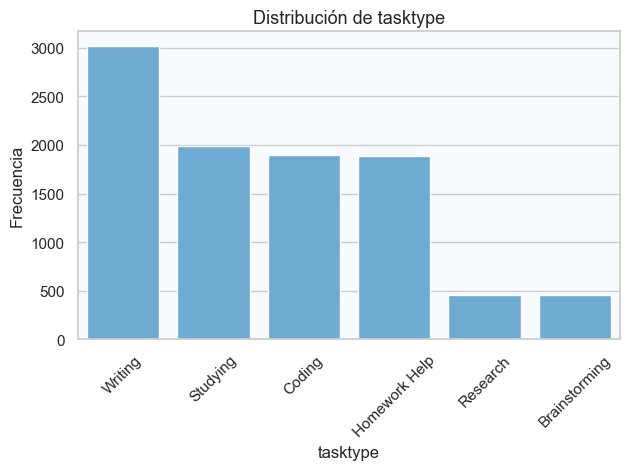

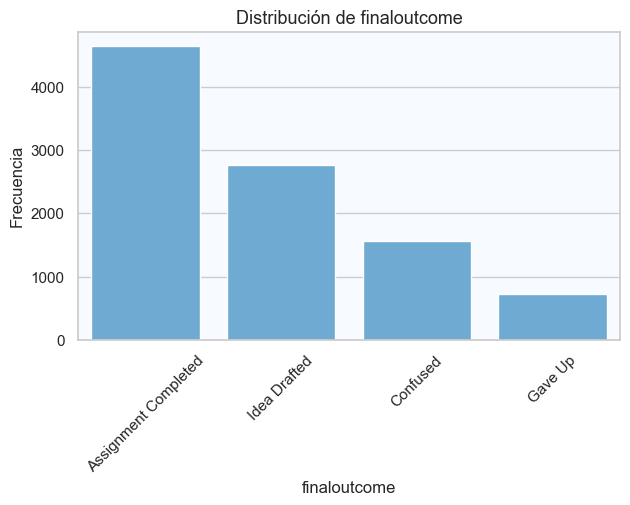

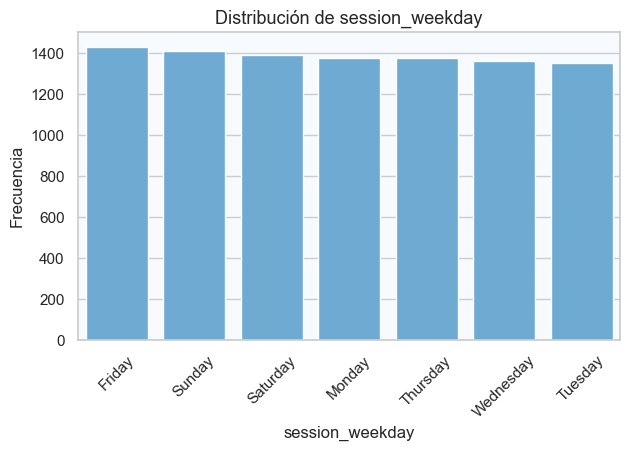

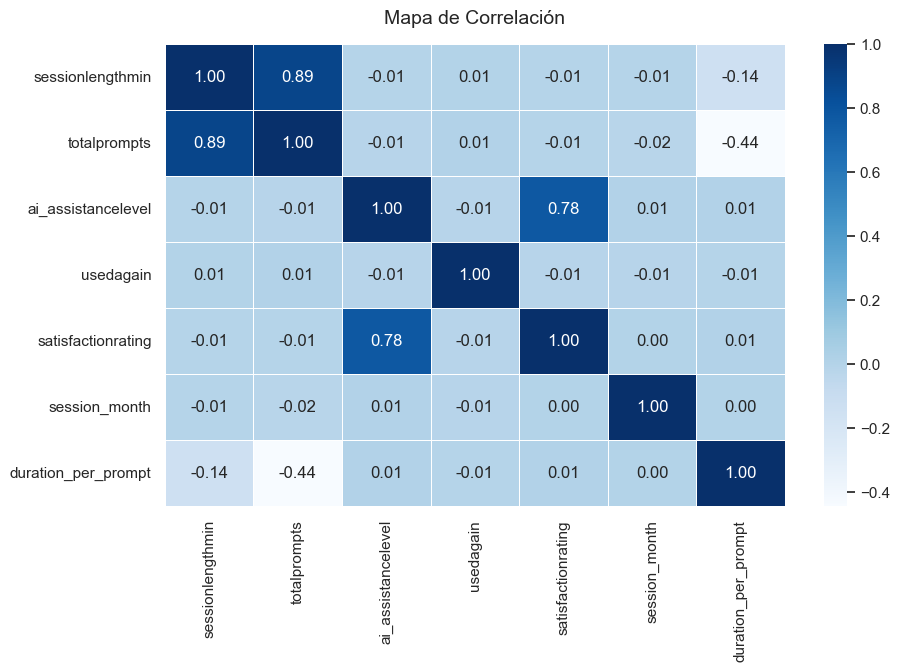

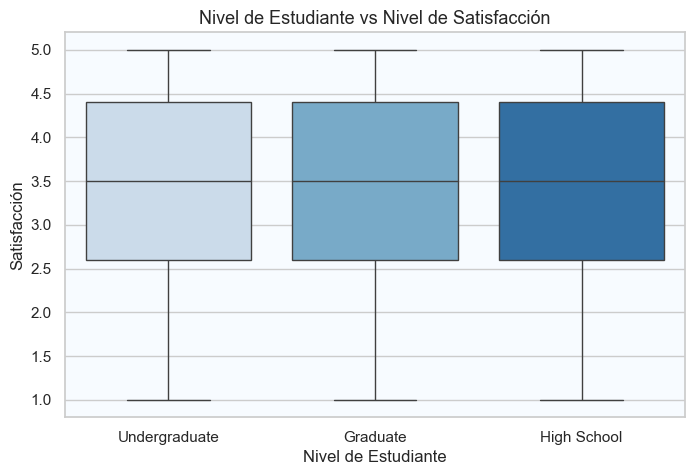

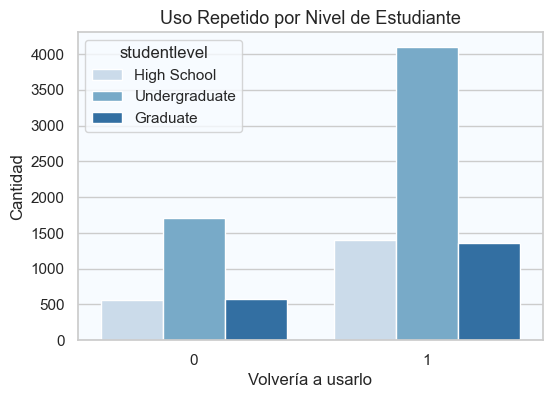

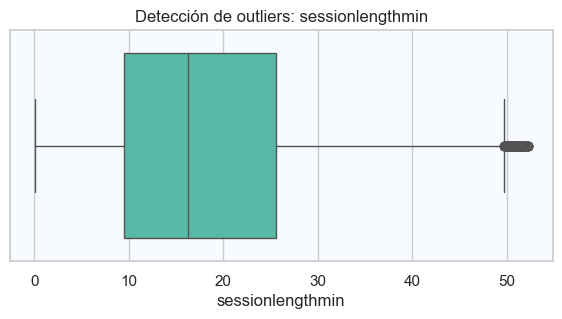

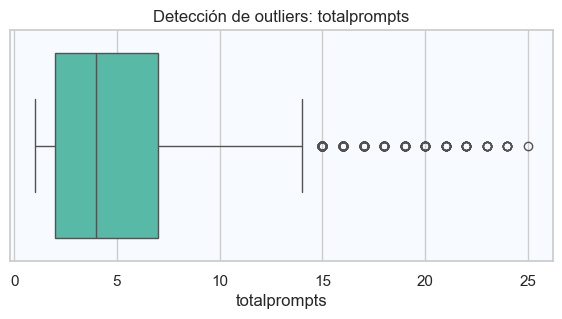

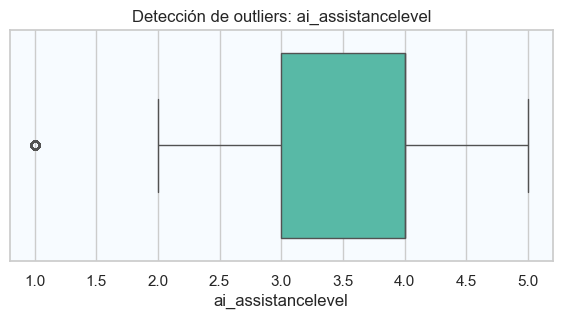

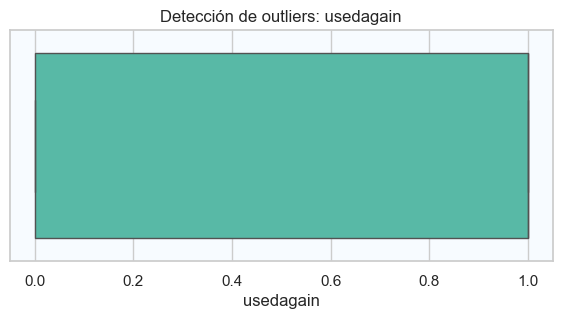

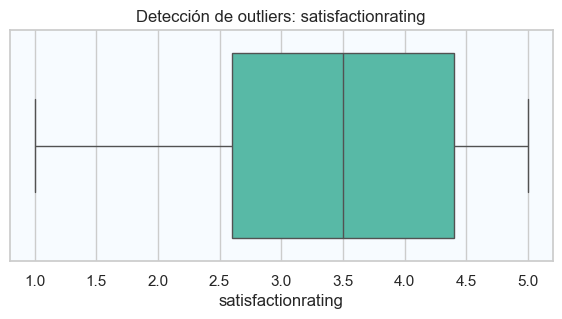

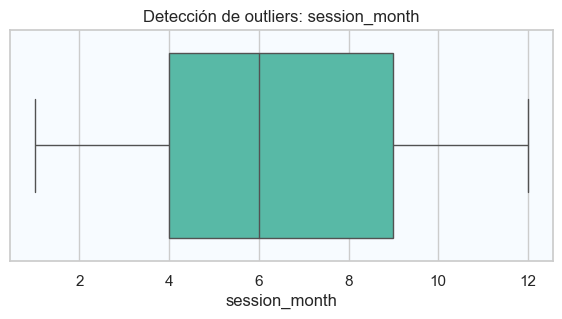

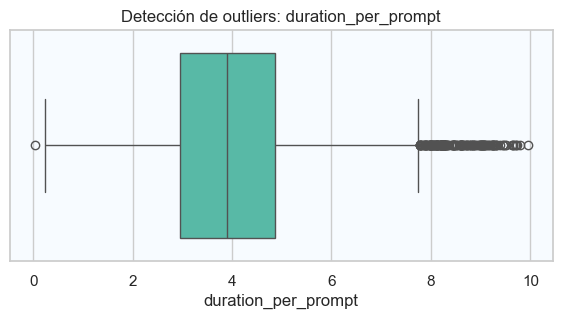

<Figure size 1000x600 with 0 Axes>

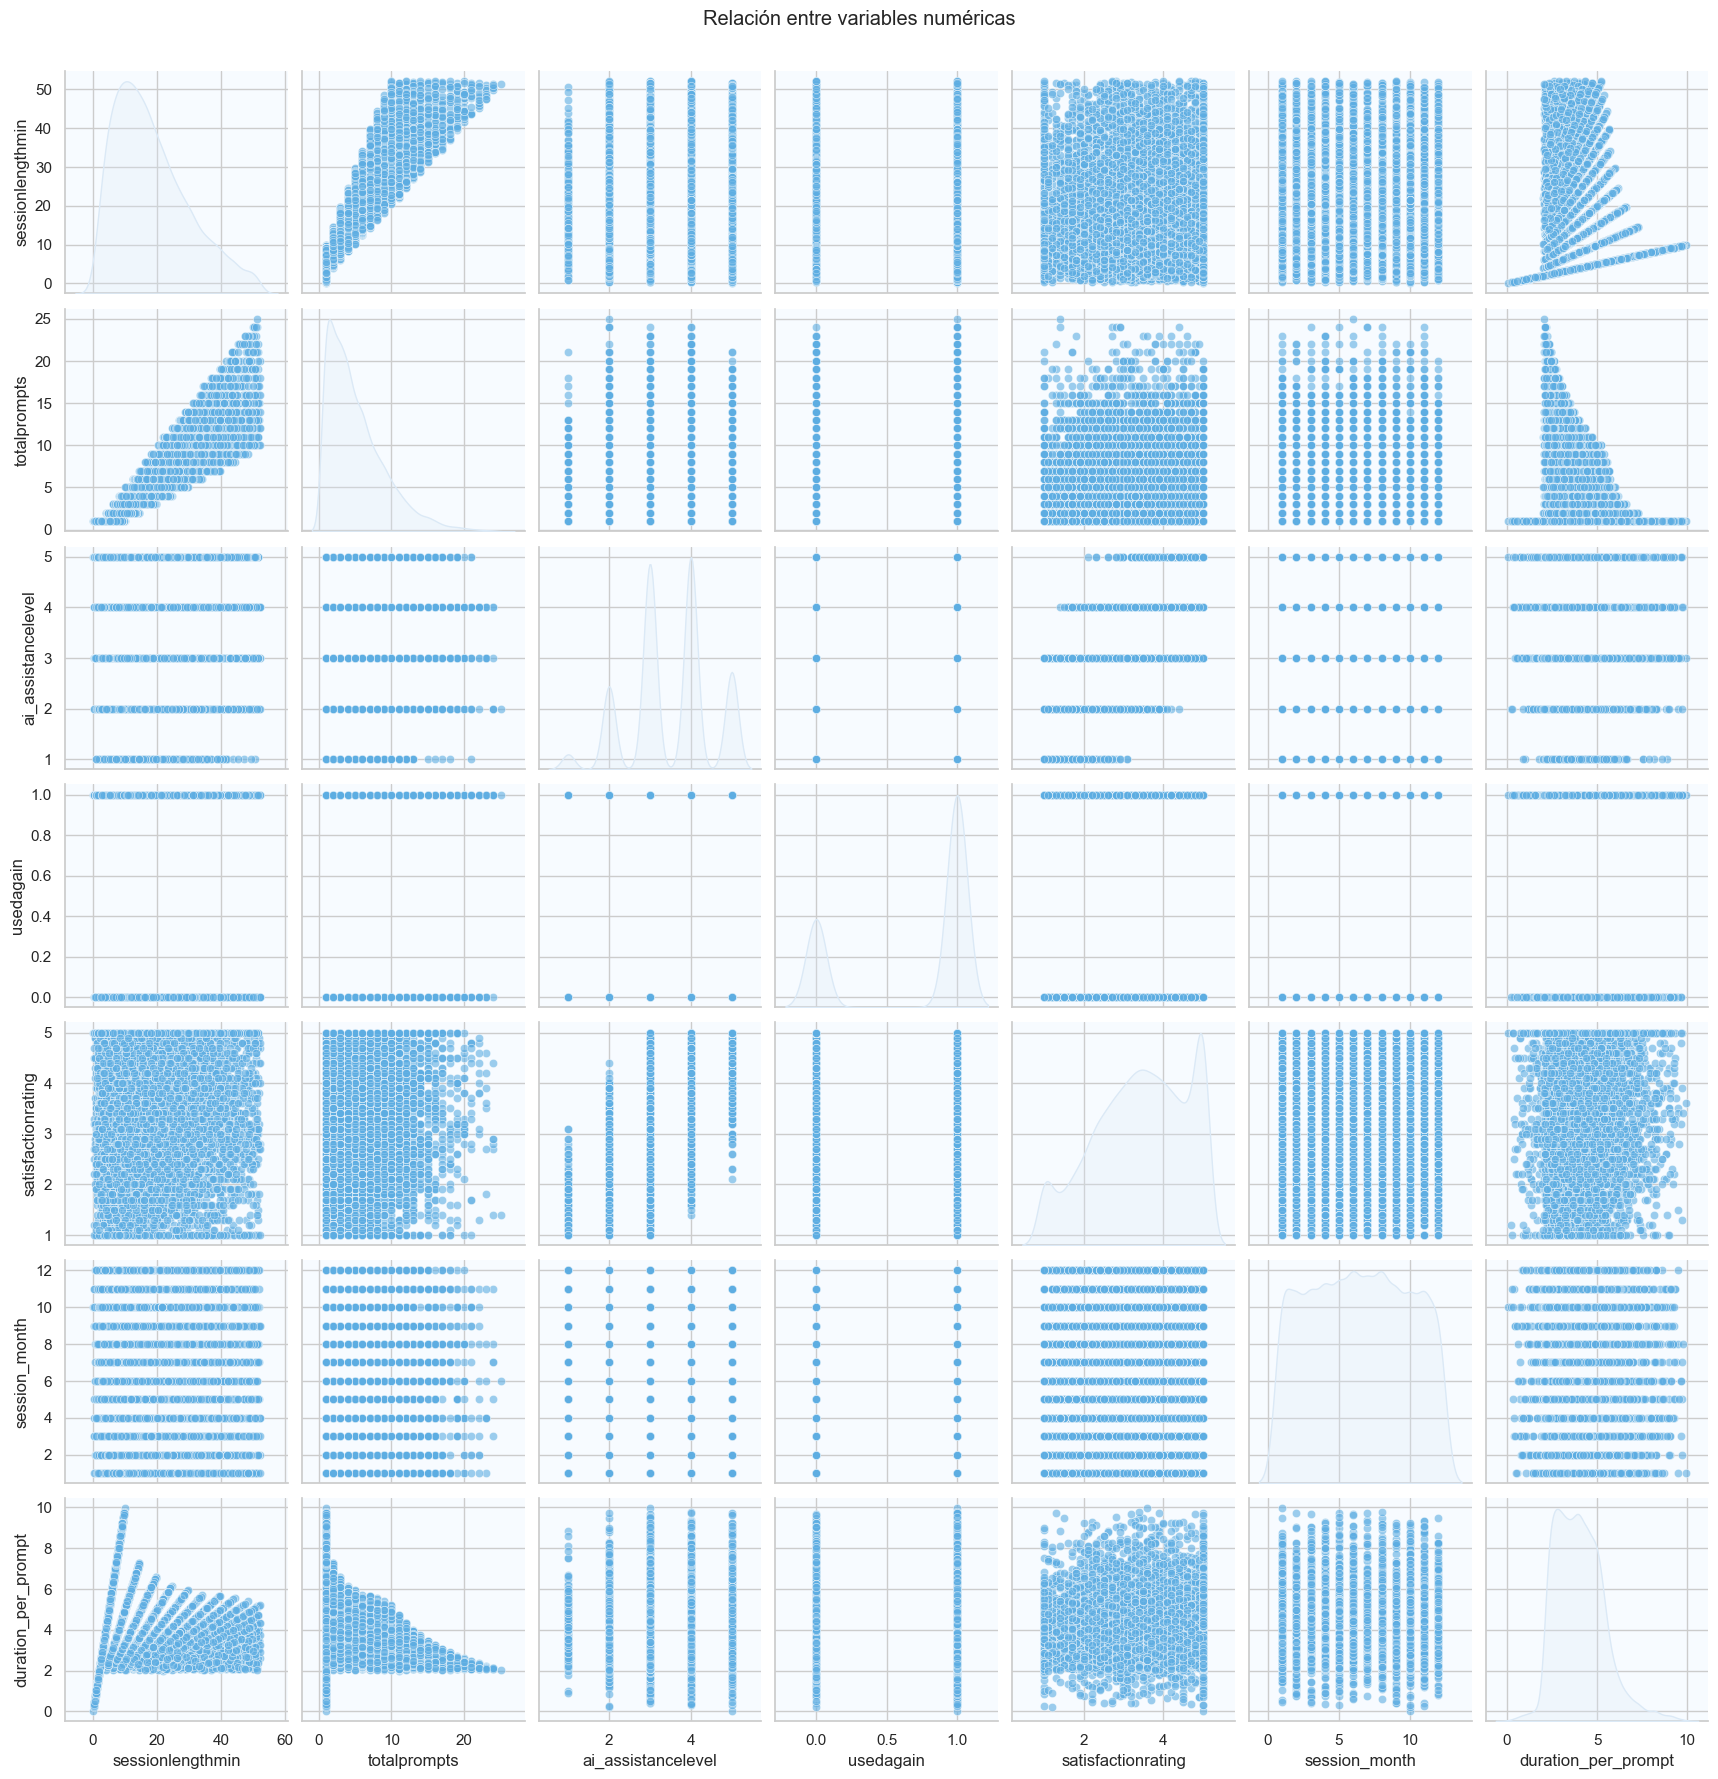


🔹 El dataset se compone de 9698 filas y 14 columnas.
🔹 Se observan variables tanto numéricas como categóricas.
🔹 Las variables 'sessionlengthmin', 'totalprompts' y 'duration_per_prompt'
   muestran mayor variabilidad y algunas posibles observaciones extremas.
🔹 No hay presencia significativa de valores nulos.
🔹 'satisfactionrating' está correlacionada con variables como
   'ai_assistancelevel' y 'sessionlengthmin', lo cual puede ser útil para ML.
🔹 La mayoría de los estudiantes son de nivel Undergraduate.
🔹 Los valores de 'usedagain' indican una alta satisfacción general.



In [3]:
# ============================================
# 🧭 EDA FINAL - Análisis Exploratorio de Datos
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo visual
sns.set(style="whitegrid", palette="Blues", rc={"axes.facecolor": "#F7FBFF"})

# -------------------------------
# 1️⃣ VISIÓN GENERAL DEL DATASET
# -------------------------------

print("Shape del dataset:", df.shape)
print("\nColumnas:")
print(df.columns.tolist())
print("\nTipos de datos:")
print(df.dtypes)
print("\nValores nulos por columna:")
print(df.isnull().sum())
print("\nValores únicos por columna:")
print(df.nunique())

# -------------------------------
# 2️⃣ ESTADÍSTICAS DESCRIPTIVAS
# -------------------------------

display(df.describe(include='all'))

# -------------------------------
# 3️⃣ DISTRIBUCIÓN DE VARIABLES
# -------------------------------

num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

# Distribución de variables numéricas
for col in num_cols:
    plt.figure(figsize=(7, 4))
    sns.histplot(df[col], kde=True, color="#4BA3C3")
    plt.title(f"Distribución de {col}", fontsize=13)
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

# Distribución de variables categóricas
for col in cat_cols:
    plt.figure(figsize=(7, 4))
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, order=order, color="#5DADE2")
    plt.title(f"Distribución de {col}", fontsize=13)
    plt.xticks(rotation=45)
    plt.ylabel("Frecuencia")
    plt.show()

# -------------------------------
# 4️⃣ CORRELACIÓN ENTRE VARIABLES
# -------------------------------

corr = df[num_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlación", fontsize=14, pad=15)
plt.show()

# -------------------------------
# 5️⃣ RELACIÓN ENTRE VARIABLES CLAVE
# -------------------------------

if 'satisfactionrating' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='studentlevel', y='satisfactionrating', palette="Blues")
    plt.title("Nivel de Estudiante vs Nivel de Satisfacción", fontsize=13)
    plt.xlabel("Nivel de Estudiante")
    plt.ylabel("Satisfacción")
    plt.show()

if 'usedagain' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='usedagain', hue='studentlevel', palette="Blues")
    plt.title("Uso Repetido por Nivel de Estudiante", fontsize=13)
    plt.xlabel("Volvería a usarlo")
    plt.ylabel("Cantidad")
    plt.show()

# -------------------------------
# 6️⃣ OUTLIERS (VALORES ATÍPICOS)
# -------------------------------

for col in num_cols:
    plt.figure(figsize=(7, 3))
    sns.boxplot(data=df, x=col, color="#48C9B0")
    plt.title(f"Detección de outliers: {col}", fontsize=12)
    plt.show()

# -------------------------------
# 7️⃣ RELACIÓN ENTRE VARIABLES NUMÉRICAS
# -------------------------------

plt.figure(figsize=(10, 6))
sns.pairplot(df[num_cols], diag_kind="kde", plot_kws={'alpha':0.6, 'color':'#5DADE2'})
plt.suptitle("Relación entre variables numéricas", y=1.02)
plt.show()

# -------------------------------
# 8️⃣ CONCLUSIÓN DEL EDA
# -------------------------------

print("""
🔹 El dataset se compone de {} filas y {} columnas.
🔹 Se observan variables tanto numéricas como categóricas.
🔹 Las variables 'sessionlengthmin', 'totalprompts' y 'duration_per_prompt'
   muestran mayor variabilidad y algunas posibles observaciones extremas.
🔹 No hay presencia significativa de valores nulos.
🔹 'satisfactionrating' está correlacionada con variables como
   'ai_assistancelevel' y 'sessionlengthmin', lo cual puede ser útil para ML.
🔹 La mayoría de los estudiantes son de nivel Undergraduate.
🔹 Los valores de 'usedagain' indican una alta satisfacción general.
""".format(df.shape[0], df.shape[1]))


🧭 Análisis Exploratorio de Datos (EDA)

El dataset contiene 9.698 registros y 14 columnas, que representan distintas características de sesiones de estudio o trabajo con asistencia de IA. No se registran valores nulos en ninguna columna, lo que permite avanzar directamente con el preprocesamiento y modelado.

📋 Información general del dataset

Variables categóricas: studentlevel, discipline, tasktype, finaloutcome, session_weekday.

Variables numéricas: sessionlengthmin, totalprompts, ai_assistancelevel, satisfactionrating, session_month, duration_per_prompt.

Variable objetivo potencial: usedagain (0 o 1, indica si el usuario volvería a usar el sistema).

🔍 Distribuciones principales

sessionlengthmin: la mayoría de las sesiones duran entre 5 y 20 minutos, con una distribución sesgada hacia la derecha, indicando que hay pocas sesiones de larga duración.

totalprompts: la mayoría de los usuarios realizaron menos de 5 interacciones por sesión, lo que sugiere un uso breve o enfocado del sistema.

ai_assistancelevel: los valores más frecuentes son 3 y 4, lo que sugiere que la mayoría de los usuarios reciben niveles medios-altos de asistencia de IA.

usedagain: presenta una clara polarización, con una mayoría que volvería a usar la herramienta (valor 1).

session_month: las sesiones se distribuyen de manera bastante uniforme durante el año, sin estacionalidad marcada.

duration_per_prompt: sigue una forma aproximadamente normal entre 2 y 6 minutos por interacción, indicando un ritmo de uso relativamente constante.

studentlevel: predominan los usuarios de nivel Undergraduate, seguidos por High School y Graduate.

🧩 Observaciones generales

No se detectan valores faltantes, lo cual facilita el procesamiento posterior.

Las variables numéricas muestran diferentes escalas y distribuciones, por lo que será necesario escalarlas antes del modelado.

Las variables categóricas presentan pocos niveles, lo que permite aplicar codificación one-hot sin generar una alta dimensionalidad.

Existen algunas variables que podrían correlacionarse, como sessionlengthmin, totalprompts y duration_per_prompt, por lo que convendrá verificar multicolinealidad antes del entrenamiento.

✅ Conclusión

El dataset se encuentra limpio y listo para la etapa de Machine Learning. Las distribuciones sugieren patrones interesantes de comportamiento, especialmente en la relación entre duración de la sesión, cantidad de prompts y la intención de volver a usar la herramienta (usedagain).

Shape: (9698, 14)
Columns: ['sessionid', 'studentlevel', 'discipline', 'sessiondate', 'sessionlengthmin', 'totalprompts', 'tasktype', 'ai_assistancelevel', 'finaloutcome', 'usedagain', 'satisfactionrating', 'session_month', 'session_weekday', 'duration_per_prompt']
      sessionid   studentlevel        discipline sessiondate  \
0  SESSION00001  Undergraduate  Computer Science  2024-11-03   
1  SESSION00002  Undergraduate        Psychology  2024-08-25   

   sessionlengthmin  totalprompts  tasktype  ai_assistancelevel  \
0             31.20            11  Studying                   2   
1             13.09             6  Studying                   3   

           finaloutcome  usedagain  satisfactionrating  session_month  \
0  Assignment Completed       True                 1.0             11   
1  Assignment Completed       True                 2.0              8   

  session_weekday  duration_per_prompt  
0          Sunday             2.836364  
1          Sunday             2.18166

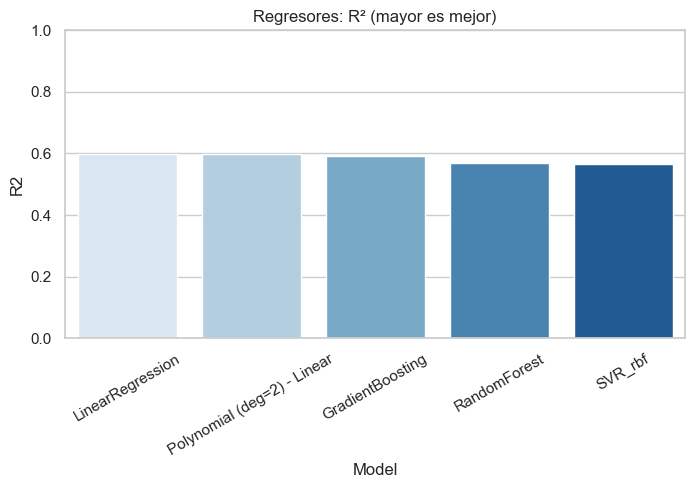

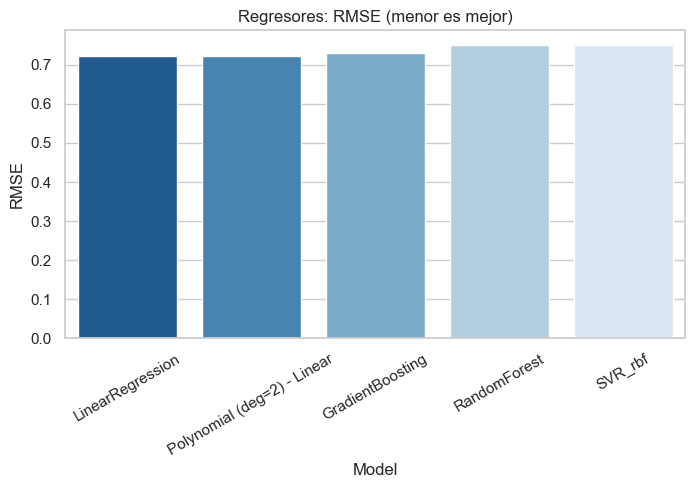


--- CLASIFICACIÓN: entrenando modelos ---
Training: LogisticRegression
Training: SVC_rbf
Training: NaiveBayes
Training: RandomForest
Training: GradientBoosting

Clasificación - resultados (ordenados por ROC_AUC):
                Model  Accuracy   ROC_AUC
3        RandomForest  0.729381  0.683525
1             SVC_rbf  0.744330  0.672952
0  LogisticRegression  0.743814  0.667790
2          NaiveBayes  0.730928  0.663675
4    GradientBoosting  0.734021  0.659598


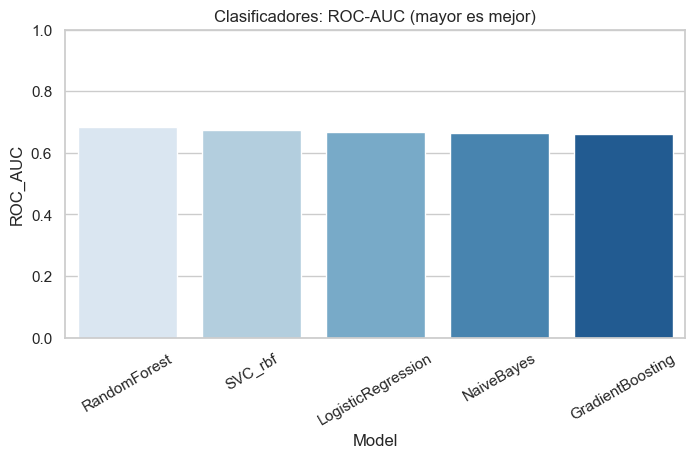

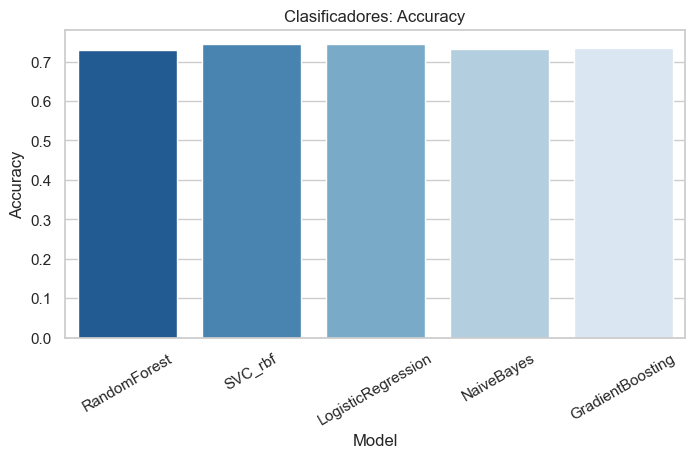


Mejor regresor (R2): LinearRegression
Mejor clasificador (ROC_AUC): RandomForest


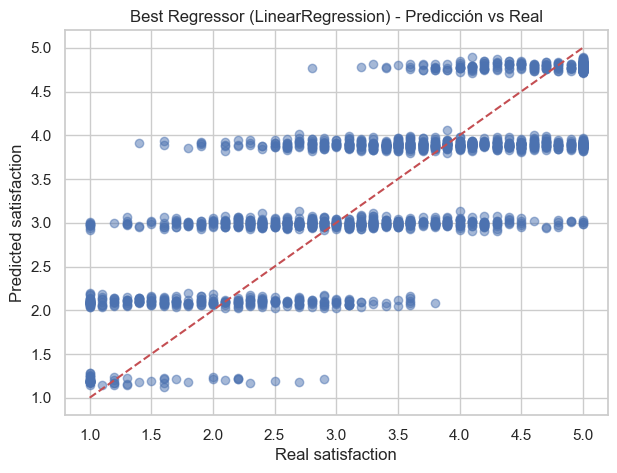

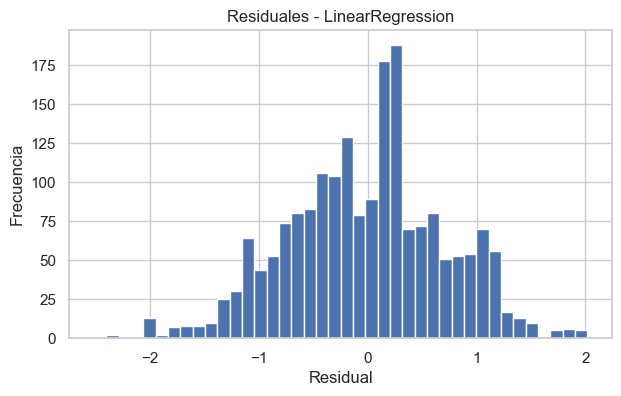


Classification report - RandomForest:

              precision    recall  f1-score   support

           0       0.56      0.37      0.45       569
           1       0.77      0.88      0.82      1371

    accuracy                           0.73      1940
   macro avg       0.66      0.63      0.63      1940
weighted avg       0.71      0.73      0.71      1940



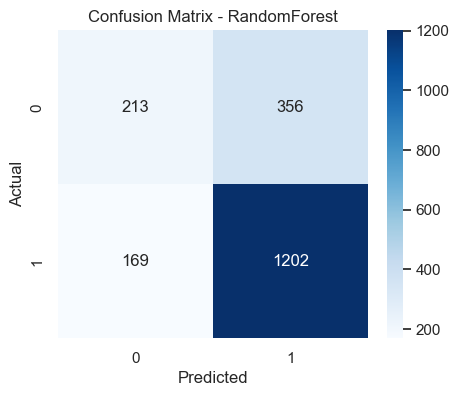

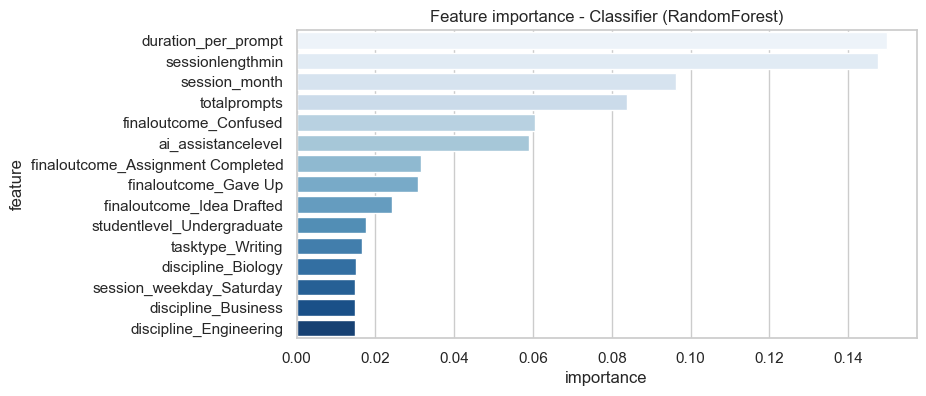


Resultados y modelos guardados en: C:\Users\I-MAG\Downloads\AI_ASSISTANT-main\AI_ASSISTANT-main\models_all


In [2]:
# ML pipeline completo (regresión + clasificación) - ejecutar en Jupyter / script
# Requerimientos: pandas, numpy, matplotlib, seaborn, scikit-learn, joblib
# Optional: xgboost, lightgbm (si están instalados, se usan también)

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import joblib

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer

# Regresión
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Métricas
from sklearn.metrics import (
    r2_score, mean_squared_error,
    accuracy_score, roc_auc_score, confusion_matrix, classification_report
)

# Intentar cargar XGBoost / LightGBM si están (opcionales)
try:
    from xgboost import XGBRegressor, XGBClassifier
    has_xgb = True
except Exception:
    has_xgb = False

try:
    from lightgbm import LGBMRegressor, LGBMClassifier
    has_lgb = True
except Exception:
    has_lgb = False

# -------------------------
# CONFIG
# -------------------------
DATA_PATH = "clean_ai_assistant_usage_student_life.csv"  # archivo limpio
MODEL_DIR = Path("models_all")
MODEL_DIR.mkdir(exist_ok=True)

RANDOM_STATE = 42
TEST_SIZE = 0.2

# Paleta celeste
sns.set_theme(style="whitegrid")
PALETTE = "Blues"

# -------------------------
# CARGAR Y PREPARAR DATOS
# -------------------------
df = pd.read_csv(DATA_PATH)
df.columns = df.columns.str.lower()

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head(2))

# Asegurar tipos
if 'sessiondate' in df.columns:
    try:
        df['sessiondate'] = pd.to_datetime(df['sessiondate'])
    except Exception:
        pass

# Targets
target_reg = 'satisfactionrating'
target_clf = 'usedagain'  # boolean

# Convertir usedagain a int si es booleano
if target_clf in df.columns:
    df[target_clf] = df[target_clf].astype(int)

# Drop rows with missing target
df = df.dropna(subset=[target_reg, target_clf])

# Features base (puedes ajustarlas)
drop_cols = ['sessionid', 'sessiondate'] if set(['sessionid','sessiondate']).issubset(df.columns) else []
features = [c for c in df.columns if c not in drop_cols + [target_reg, target_clf]]

# Separar num y cat
num_features = df[features].select_dtypes(include=[np.number]).columns.tolist()
cat_features = [c for c in features if c not in num_features]

print(f"Num features ({len(num_features)}): {num_features}")
print(f"Cat features ({len(cat_features)}): {cat_features}")

# Preprocesadores
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
   ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))

])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, cat_features)
], remainder='drop')

# -------------------------
# MODELOS A PROBAR
# -------------------------

# REGRESIÓN: lista de (nombre, objeto)
regressors = [
    ("LinearRegression", LinearRegression()),
    ("Polynomial (deg=2) - Linear", Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('scaler', StandardScaler()),
        ('lin', LinearRegression())
    ])),
    ("SVR_rbf", SVR(kernel='rbf', C=1.0, epsilon=0.2)),
    ("RandomForest", RandomForestRegressor(n_estimators=200, random_state=RANDOM_STATE, n_jobs=-1)),
    ("GradientBoosting", GradientBoostingRegressor(n_estimators=200, random_state=RANDOM_STATE))
]

if has_xgb:
    regressors.append(("XGBoost", XGBRegressor(n_estimators=300, random_state=RANDOM_STATE, verbosity=0)))
if has_lgb:
    regressors.append(("LightGBM", LGBMRegressor(n_estimators=300, random_state=RANDOM_STATE)))

# CLASIFICACIÓN: lista de (nombre, objeto)
classifiers = [
    ("LogisticRegression", LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)),
    ("SVC_rbf", SVC(kernel='rbf', probability=True, random_state=RANDOM_STATE)),
    ("NaiveBayes", GaussianNB()),
    ("RandomForest", RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE, n_jobs=-1)),
    ("GradientBoosting", GradientBoostingClassifier(n_estimators=200, random_state=RANDOM_STATE))
]

if has_xgb:
    classifiers.append(("XGBoost", XGBClassifier(n_estimators=300, use_label_encoder=False, eval_metric='logloss', random_state=RANDOM_STATE)))
if has_lgb:
    classifiers.append(("LightGBM", LGBMClassifier(n_estimators=300, random_state=RANDOM_STATE)))

# -------------------------
# SPLIT DATA
# -------------------------
X = df[features].copy()
y_reg = df[target_reg].astype(float).copy()
y_clf = df[target_clf].astype(int).copy()

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=TEST_SIZE, random_state=RANDOM_STATE)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_clf, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y_clf)

# -------------------------
# FUNCIONES UTILES
# -------------------------
def evaluate_regression(pipe, X_test, y_test, name):
    y_pred = pipe.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return {'model': name, 'r2': r2, 'rmse': rmse, 'y_test': y_test, 'y_pred': y_pred}

def evaluate_classification(pipe, X_test, y_test, name):
    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:,1] if hasattr(pipe, "predict_proba") else None
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan
    return {'model': name, 'accuracy': acc, 'roc_auc': roc, 'y_test': y_test, 'y_pred': y_pred, 'y_prob': y_prob}

# -------------------------
# ENTRENAR Y EVALUAR REGRESORES
# -------------------------
reg_results = []
print("\n--- REGRESIÓN: entrenando modelos ---")
for name, model in regressors:
    print("Training:", name)
    # pipeline: preprocessor -> model
    # special case: polynomial pipeline already does scaling & poly; handle by bypassing preprocessor
    if name.startswith("Polynomial"):
        pipe = Pipeline([('poly_pipeline', model)])
        pipe.fit(X_train_r[num_features], y_train_r)  # only numeric for poly linear
        # For polynomial linear we used only numeric features; evaluate similarly
        res = evaluate_regression(pipe, X_test_r[num_features], y_test_r, name)
    else:
        pipe = Pipeline([('preprocessor', preprocessor), ('model', model)])
        pipe.fit(X_train_r, y_train_r)
        res = evaluate_regression(pipe, X_test_r, y_test_r, name)
    reg_results.append(res)
    # Guardar modelo
    joblib.dump(pipe, MODEL_DIR / f"reg_{name}.joblib")

# Mostrar tabla de regresión
reg_df = pd.DataFrame([{'Model': r['model'], 'R2': r['r2'], 'RMSE': r['rmse']} for r in reg_results]).sort_values('R2', ascending=False)
print("\nRegresión - resultados (ordenados por R2):")
print(reg_df)

# Plot comparativo R2 y RMSE
plt.figure(figsize=(8,4))
sns.barplot(x='Model', y='R2', data=reg_df, palette=PALETTE)
plt.title("Regresores: R² (mayor es mejor)")
plt.xticks(rotation=30)
plt.ylim(0,1)
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(x='Model', y='RMSE', data=reg_df, palette="Blues_r")
plt.title("Regresores: RMSE (menor es mejor)")
plt.xticks(rotation=30)
plt.show()

# -------------------------
# ENTRENAR Y EVALUAR CLASIFICADORES
# -------------------------
clf_results = []
print("\n--- CLASIFICACIÓN: entrenando modelos ---")
for name, model in classifiers:
    print("Training:", name)
    pipe = Pipeline([('preprocessor', preprocessor), ('model', model)])
    # para SVC puede ser costoso - usar default; si falla por tiempo, la ejecución puede ser interrumpida por el usuario
    pipe.fit(X_train_c, y_train_c)
    res = evaluate_classification(pipe, X_test_c, y_test_c, name)
    clf_results.append(res)
    joblib.dump(pipe, MODEL_DIR / f"clf_{name}.joblib")

# Tabla clasificación
clf_df = pd.DataFrame([{'Model': r['model'], 'Accuracy': r['accuracy'], 'ROC_AUC': r['roc_auc']} for r in clf_results]).sort_values('ROC_AUC', ascending=False)
print("\nClasificación - resultados (ordenados por ROC_AUC):")
print(clf_df)

# Plot ROC_AUC and Accuracy
plt.figure(figsize=(8,4))
sns.barplot(x='Model', y='ROC_AUC', data=clf_df, palette=PALETTE)
plt.title("Clasificadores: ROC-AUC (mayor es mejor)")
plt.xticks(rotation=30)
plt.ylim(0,1)
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(x='Model', y='Accuracy', data=clf_df, palette="Blues_r")
plt.title("Clasificadores: Accuracy")
plt.xticks(rotation=30)
plt.show()

# -------------------------
# RESULTADOS DETALLADOS: imprimir mejores modelos y matrices
# -------------------------
best_reg = reg_df.iloc[0]['Model']
best_clf = clf_df.iloc[0]['Model']

print(f"\nMejor regresor (R2): {best_reg}")
print(f"Mejor clasificador (ROC_AUC): {best_clf}")

# Mostrar métricas y gráficos de residuales para el mejor regresor
best_reg_res = next(r for r in reg_results if r['model'] == best_reg)
y_test = best_reg_res['y_test']
y_pred = best_reg_res['y_pred']
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Real satisfaction")
plt.ylabel("Predicted satisfaction")
plt.title(f"Best Regressor ({best_reg}) - Predicción vs Real")
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(7,4))
plt.hist(residuals, bins=40)
plt.title(f"Residuales - {best_reg}")
plt.xlabel("Residual")
plt.ylabel("Frecuencia")
plt.show()

# Best classifier: confusion matrix + classification report
best_clf_res = next(r for r in clf_results if r['model'] == best_clf)
y_test_c = best_clf_res['y_test']
y_pred_c = best_clf_res['y_pred']
print(f"\nClassification report - {best_clf}:\n")
print(classification_report(y_test_c, y_pred_c))

cm = confusion_matrix(y_test_c, y_pred_c)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap=PALETTE)
plt.title(f"Confusion Matrix - {best_clf}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -------------------------
# IMPORTANCIA DE FEATURES (usando el mejor regressor/clasificador si son árboles)
# -------------------------
def get_feature_names(preprocessor):
    # números
    num = num_features
    # cat names from onehot
    cat = []
    try:
        ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
        cat = list(ohe.get_feature_names_out(cat_features))
    except Exception:
        # alternativa: try to infer
        pass
    return num + cat

# Regresor importances
best_reg_pipe = joblib.load(MODEL_DIR / f"reg_{best_reg}.joblib")
if hasattr(best_reg_pipe.named_steps['model'], 'feature_importances_'):
    feat_names = get_feature_names(best_reg_pipe.named_steps['preprocessor'])
    importances = best_reg_pipe.named_steps['model'].feature_importances_
    imp_df = pd.DataFrame({'feature': feat_names, 'importance': importances})
    imp_df = imp_df.sort_values('importance', ascending=False).head(15)
    plt.figure(figsize=(8,4))
    sns.barplot(x='importance', y='feature', data=imp_df, palette=PALETTE)
    plt.title(f"Feature importance - Regressor ({best_reg})")
    plt.show()

# Clasificador importances
best_clf_pipe = joblib.load(MODEL_DIR / f"clf_{best_clf}.joblib")
if hasattr(best_clf_pipe.named_steps['model'], 'feature_importances_'):
    feat_names = get_feature_names(best_clf_pipe.named_steps['preprocessor'])
    importances = best_clf_pipe.named_steps['model'].feature_importances_
    imp_df = pd.DataFrame({'feature': feat_names, 'importance': importances})
    imp_df = imp_df.sort_values('importance', ascending=False).head(15)
    plt.figure(figsize=(8,4))
    sns.barplot(x='importance', y='feature', data=imp_df, palette=PALETTE)
    plt.title(f"Feature importance - Classifier ({best_clf})")
    plt.show()

# -------------------------
# GUARDAR RESUMEN
# -------------------------
reg_df.to_csv(MODEL_DIR / "regression_results_summary.csv", index=False)
clf_df.to_csv(MODEL_DIR / "classification_results_summary.csv", index=False)
print(f"\nResultados y modelos guardados en: {MODEL_DIR.resolve()}")
